In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 27

In [3]:
df_orig = pd.read_csv('./winequalityN.csv')
df_orig.dropna(inplace=True)
# df_white = df[df.type=='white'].drop(columns='type')
# df_red = df[df.type=='white'].drop(columns='type')

* highly imbalanced

In [4]:
from sklearn.preprocessing import StandardScaler

## scorers

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

# Logisitic Regression

In [6]:
from sklearn.linear_model import LogisticRegressionCV

In [7]:
df = df_orig.copy()
df['type'] = df.type.map({'red': 1, 'white': 0})
x_train_val, x_test, y_train_val, y_test = train_test_split(df.drop(columns=['quality']),
                                                            df['quality'],
                                                             stratify=df['quality'],
                                                             test_size=0.2,
                                                             shuffle=True,
                                                             random_state=RANDOM_SEED )

In [8]:
res = []

ss = StandardScaler()
x_train_val = ss.fit_transform(x_train_val)
x_test = ss.transform(x_test)

class_weight = {label:(y_train_val==label).sum()/len(y_train_val) for label in y_train_val.unique()}
lr = LogisticRegressionCV(random_state=RANDOM_SEED,  n_jobs=-1,
                          Cs=3,
                          max_iter=500,
#                           class_weight=class_weight,
                         )

lr.fit(x_train_val, y_train_val)

pred = lr.predict(x_train_val)
acc_train = (y_train_val == pred).sum() / len(y_train_val)
f1_train = f1_score(y_train_val, pred, average='weighted')
bal_acc_train = recall_score(y_train_val, pred, average='weighted')
res.append(['train', acc_train, f1_train, bal_acc_train, len(y_train_val)])

pred = lr.predict(x_test)
acc_test = (y_test == pred).sum() / len(y_test)
f1_test = f1_score(y_test, pred, average='weighted')
bal_acc_test = recall_score(y_test, pred, average='weighted')
res.append(['test', acc_test, f1_test, bal_acc_test, len(y_test)])



C:\Users\Hades\Anaconda3\envs\torch_cv\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [9]:
df_res = pd.DataFrame(res, columns = ['Eval', 'Acc', 'Rec', 'F1', 'Support'])
df_res

,Eval,Acc,Rec,F1,Support
0,train,0.546809,0.517215,0.546809,5170
1,test,0.528229,0.495081,0.528229,1293


In [10]:
df_orig['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

# converting classes to low, mid, high due to small support on some classes

In [11]:
df = df_orig.copy()
df['type'] = df.type.map({'red': 1, 'white': 0})
df['quality'] = df['quality'].map({3:0, 4:0, 5:1, 6:2, 7:3, 8:4, 9:4})
x_train_val, x_test, y_train_val, y_test = train_test_split(df.drop(columns=['quality']),
                                                             df['quality'],
                                                             stratify=df['quality'],
                                                             test_size=0.2,
                                                             shuffle=True,
                                                             random_state=RANDOM_SEED )

In [12]:
df['quality'].value_counts()

2    2820
1    2128
3    1074
0     244
4     197
Name: quality, dtype: int64

In [13]:
res = []

ss = StandardScaler()
x_train_val = ss.fit_transform(x_train_val)
x_test = ss.transform(x_test)

class_weight = {label:(y_train_val==label).sum()/len(y_train_val) for label in y_train_val.unique()}
lr = LogisticRegressionCV(random_state=RANDOM_SEED,  n_jobs=-1,
                          Cs=3,
                          max_iter=500,
#                           class_weight=class_weight,
                         )

lr.fit(x_train_val, y_train_val)

pred_train = lr.predict(x_train_val)
acc_train = (y_train_val == pred_train).sum() / len(y_train_val)
f1_train = f1_score(y_train_val, pred_train, average='weighted')
bal_acc_train = recall_score(y_train_val, pred_train, average='weighted')
res.append(['train', acc_train, f1_train, bal_acc_train, len(y_train_val)])

pred_test = lr.predict(x_test)
acc_test = (y_test == pred_test).sum() / len(y_test)
f1_test = f1_score(y_test, pred_test, average='weighted')
bal_acc_test = recall_score(y_test, pred_test, average='weighted')
res.append(['test', acc_test, f1_test, bal_acc_test, len(y_test)])

df_res = pd.DataFrame(res, columns = ['Eval', 'Acc', 'Rec', 'F1', 'Support'])
df_res

,Eval,Acc,Rec,F1,Support
0,train,0.547969,0.519331,0.547969,5170
1,test,0.532096,0.501497,0.532096,1293


In [14]:
pd.DataFrame(np.array(precision_recall_fscore_support(y_test, pred_test, average=None)).T,
             columns = ['Prec', 'Rec', 'F1', 'Support'])

,Prec,Rec,F1,Support
0,0.500000,0.081633,0.140351,49.0
1,0.606715,0.593897,0.600237,426.0
2,0.507134,0.693262,0.585768,564.0
3,0.421053,0.186047,0.258065,215.0
4,0.000000,0.000000,0.000000,39.0


# so we have problems identifying small classes

# SVM

In [171]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

* SVm with best parameters so far

In [223]:
df = df_orig.copy()
df['type'] = df.type.map({'red': 1, 'white': 0})
df.drop(columns='type', inplace=True)
df['quality'] = df['quality'].map({3:0, 4:0, 5:1, 6:2, 7:3, 8:4, 9:4})
x_train_val, x_test, y_train_val, y_test = train_test_split(df.drop(columns=['quality']),
                                                            df['quality'],
                                                             stratify=df['quality'],
                                                             test_size=0.2,
                                                             shuffle=True,
                                                             random_state=RANDOM_SEED )

res = []

ss = StandardScaler()
x_train_val = ss.fit_transform(x_train_val)
x_test = ss.transform(x_test)

class_weight = {label:(y_train_val==label).sum()/len(y_train_val) for label in y_train_val.unique()}

clf = svm.SVC(kernel='rbf', C=300, cache_size=4000, random_state=RANDOM_SEED)
scores = cross_val_score(clf, x_train_val, y_train_val, cv=5, scoring='f1_micro', n_jobs=-1)

In [224]:
scores.mean()

0.5891682785299807

In [218]:
clf.fit(x_train_val, y_train_val)

pred_train = clf.predict(x_train_val)
acc_train = (y_train_val == pred_train).sum() / len(y_train_val)
f1_train = f1_score(y_train_val, pred_train, average='weighted')
bal_acc_train = recall_score(y_train_val, pred_train, average='weighted')
res.append(['train', acc_train, f1_train, bal_acc_train, len(y_train_val)])

pred_test = clf.predict(x_test)
acc_test = (y_test == pred_test).sum() / len(y_test)
f1_test = f1_score(y_test, pred_test, average='weighted')
bal_acc_test = recall_score(y_test, pred_test, average='weighted')
res.append(['test', acc_test, f1_test, bal_acc_test, len(y_test)])

df_res = pd.DataFrame(res, columns = ['Eval', 'Acc', 'Rec', 'F1', 'Support'])
df_res

,Eval,Acc,Rec,F1,Support
0,train,0.878917,0.878765,0.878917,5170
1,test,0.594741,0.592086,0.594741,1293


In [219]:
pd.DataFrame(np.array(precision_recall_fscore_support(y_train_val, pred_train, average=None)).T,
             columns = ['Prec', 'Rec', 'F1', 'Support'])

,Prec,Rec,F1,Support
0,0.942408,0.923077,0.932642,195.0
1,0.896305,0.883666,0.889941,1702.0
2,0.851357,0.903812,0.876801,2256.0
3,0.893316,0.809080,0.849114,859.0
4,0.984375,0.797468,0.881119,158.0


In [220]:
pd.DataFrame(np.array(precision_recall_fscore_support(y_test, pred_test, average=None)).T,
             columns = ['Prec', 'Rec', 'F1', 'Support'])

,Prec,Rec,F1,Support
0,0.263158,0.306122,0.283019,49.0
1,0.625571,0.643192,0.634259,426.0
2,0.620632,0.661348,0.640343,564.0
3,0.552941,0.437209,0.488312,215.0
4,0.481481,0.333333,0.393939,39.0


# LightGBM

In [15]:
import lightgbm

In [225]:
df = df_orig.copy()
df['type'] = df.type.map({'red': 1, 'white': 0})
df['quality'] = df['quality'].map({3:0, 4:0, 5:1, 6:2, 7:3, 8:4, 9:4})
x_train_val, x_test, y_train_val, y_test = train_test_split(df.drop(columns=['quality']),
                                                             df['quality'],
                                                             stratify=df['quality'],
                                                             test_size=0.2,
                                                             shuffle=True,
                                                             random_state=RANDOM_SEED )

x_train_val['weight'] = y_train_val.map(y_train_val.value_counts(normalize=True))
x_train_val['weight']

1214    0.436364
1672    0.329207
5585    0.329207
137     0.329207
1356    0.436364
          ...   
1102    0.329207
539     0.436364
413     0.329207
95      0.436364
2483    0.436364
Name: weight, Length: 5170, dtype: float64

In [226]:
np.random.seed(RANDOM_SEED)
light_ds_train = lightgbm.Dataset(x_train_val, label=y_train_val, weight='weight', )
x_train_val.drop(columns='weight', inplace=True)

In [130]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval

In [56]:
param_space = {
    'train_ds': light_ds_train,
    'num_boost_round': hp.choice('num_boost_round', range(150, 400, 50)),
    'application': 'multiclass',
    'metric': 'multi_error',
    'num_class': y_train_val.nunique(),
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': hp.choice('num_leaves', range(10, 20, 2)),
    'max_depth': hp.uniformint('max_depth', 4, 10),
    'feature_fraction': hp.choice('feature_fraction', range(60, 95, 5)) / 100,
    'bagging_fraction': hp.choice('bagging_fraction', range(60, 95, 5)) / 100,
    'bagging_freq': hp.uniformint('bagging_freq', 1, 3),
    'learning_rate': hp.choice('learning_rate', range(1, 75, 2)) / 100,
    'lambda_l2': hp.choice('lambda_l2', [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]),
    'lambda_l1': hp.choice('lambda_l1', [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]),
}

In [57]:
def error_rate(params):
    cv_results = lightgbm.cv(
                            params={key:params[key] for key in params.keys()
                                    if key not in ['train_ds', 'num_boost_round']},
                            train_set=params['train_ds'],
                            num_boost_round=params['num_boost_round'],
                            nfold=5,
                            )
    print(params)
    print(cv_results['multi_error-mean'][-1])
    print('==========================')
    
    return {'loss': cv_results['multi_error-mean'][-1],
            'status': STATUS_OK
           }


trials = Trials()
best = fmin(fn=error_rate,
            space=param_space,
            algo=tpe.suggest,
            max_evals=500,
            trials=trials,
            rstate=np.random,
           )
    
print('best:', best)
print('trials:')
res = pd.DataFrame([(1-trial['result']['loss'], trial['misc']['vals']) for trial in trials],
                  columns=['accuracy', 'params'])

res_best = res.sort_values('accuracy', ascending=False)
res_best.iloc[:10]

{'application': 'multiclass', 'bagging_fraction': 0.8, 'bagging_freq': 2, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 10, 'lambda_l2': 3, 'learning_rate': 0.71, 'max_depth': 4, 'metric': 'multi_error', 'num_boost_round': 250, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3940038684719536                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 1, 'boosting': 'gbdt', 'feature_fraction': 0.65, 'is_unbalance': 'true', 'lambda_l1': 3, 'lambda_l2': 30, 'learning_rate': 0.61, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 200, 'num_class': 5, 'num_leaves': 10, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3773694390715667                                                                                                     
{'application': 'multiclass

0.3551257253384913                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.8, 'bagging_freq': 2, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.3, 'lambda_l2': 30, 'learning_rate': 0.37, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 200, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3630560928433269                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 2, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 1, 'learning_rate': 0.71, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.36054158607350095         

{'application': 'multiclass', 'bagging_fraction': 0.85, 'bagging_freq': 1, 'boosting': 'gbdt', 'feature_fraction': 0.9, 'is_unbalance': 'true', 'lambda_l1': 0.01, 'lambda_l2': 0.01, 'learning_rate': 0.17, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.34893617021276596                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.6, 'bagging_freq': 1, 'boosting': 'gbdt', 'feature_fraction': 0.9, 'is_unbalance': 'true', 'lambda_l1': 0.01, 'lambda_l2': 0.01, 'learning_rate': 0.17, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.34854932301740815                                                                                                    
{'application': 'mu

0.4502901353965184                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 0.03, 'lambda_l2': 0.01, 'learning_rate': 0.55, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.40212765957446805                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.6, 'bagging_freq': 2, 'boosting': 'gbdt', 'feature_fraction': 0.6, 'is_unbalance': 'true', 'lambda_l1': 3, 'lambda_l2': 0.01, 'learning_rate': 0.13, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 250, 'num_class': 5, 'num_leaves': 10, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.38529980657640234    

{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 2, 'boosting': 'gbdt', 'feature_fraction': 0.9, 'is_unbalance': 'true', 'lambda_l1': 0.01, 'lambda_l2': 0.03, 'learning_rate': 0.73, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 150, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3866537717601547                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.65, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.75, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 1, 'learning_rate': 0.21, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3468085106382979                                                                                                     
{'application': 'multi

0.35628626692456483                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.65, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.75, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 1, 'learning_rate': 0.21, 'max_depth': 6, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3477756286266925                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.65, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.75, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 1, 'learning_rate': 0.29, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 200, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3500967117988395      

{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.6, 'is_unbalance': 'true', 'lambda_l1': 10, 'lambda_l2': 0.1, 'learning_rate': 0.67, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 10, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.386073500967118                                                                                                      
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.6, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'learning_rate': 0.35, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 12, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3508704061895552                                                                                                     
{'application': 'multicla

0.36518375241779494                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.6, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'learning_rate': 0.31, 'max_depth': 6, 'metric': 'multi_error', 'num_boost_round': 200, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3531914893617022                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.65, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.3, 'learning_rate': 0.09, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 12, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3653771760154739    

{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.6, 'is_unbalance': 'true', 'lambda_l1': 0.03, 'lambda_l2': 0.1, 'learning_rate': 0.43, 'max_depth': 6, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3601547388781431                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.8, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.65, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 30, 'learning_rate': 0.37, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3607350096711799                                                                                                     
{'application': 'multicla

0.36653771760154735                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.65, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 30, 'lambda_l2': 1, 'learning_rate': 0.17, 'max_depth': 6, 'metric': 'multi_error', 'num_boost_round': 200, 'num_class': 5, 'num_leaves': 10, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.4413926499032882                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.6, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.6, 'is_unbalance': 'true', 'lambda_l1': 10, 'lambda_l2': 0.1, 'learning_rate': 0.33, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 16, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.39071566731141194       

{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.01, 'lambda_l2': 0.1, 'learning_rate': 0.39, 'max_depth': 10, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.35241779497098646                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 2, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 10, 'lambda_l2': 0.1, 'learning_rate': 0.61, 'max_depth': 10, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.38085106382978723                                                                                                    
{'application': 'mul

0.3502901353965183                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'learning_rate': 0.21, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.34197292069632496                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'learning_rate': 0.53, 'max_depth': 10, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.35880077369439073  

{'application': 'multiclass', 'bagging_fraction': 0.85, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.7, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.03, 'learning_rate': 0.71, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3543520309477756                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.03, 'lambda_l2': 3, 'learning_rate': 0.33, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 250, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3495164410058027                                                                                                     
{'application': 'multi

0.39613152804642165                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.8, 'bagging_freq': 1, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.05, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.36228239845261123                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.65, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'learning_rate': 0.57, 'max_depth': 10, 'metric': 'multi_error', 'num_boost_round': 150, 'num_class': 5, 'num_leaves': 10, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.36518375241779494   

{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 30, 'learning_rate': 0.21, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 200, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.37195357833655707                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.01, 'lambda_l2': 0.1, 'learning_rate': 0.11, 'max_depth': 10, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.34854932301740815                                                                                                    
{'application': 'mult

0.43713733075435196                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 1, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.01, 'lambda_l2': 0.3, 'learning_rate': 0.35, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.34796905222437136                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.65, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'learning_rate': 0.49, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 10, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.35880077369439073  

{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.7, 'is_unbalance': 'true', 'lambda_l1': 0.01, 'lambda_l2': 0.1, 'learning_rate': 0.57, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.35609284332688584                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.8, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 10, 'lambda_l2': 1, 'learning_rate': 0.51, 'max_depth': 10, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.37678916827853                                                                                                       
{'application': 'multic

0.3820116054158607                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.9, 'bagging_freq': 2, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'learning_rate': 0.45, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 250, 'num_class': 5, 'num_leaves': 12, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.35570599613152803                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 3, 'lambda_l2': 0.03, 'learning_rate': 0.07, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.37195357833655707     

{'application': 'multiclass', 'bagging_fraction': 0.65, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.75, 'is_unbalance': 'true', 'lambda_l1': 3, 'lambda_l2': 0.1, 'learning_rate': 0.69, 'max_depth': 5, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.35996131528046427                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 2, 'boosting': 'gbdt', 'feature_fraction': 0.65, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 10, 'learning_rate': 0.27, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.35493230174081236                                                                                                    
{'application': 'multicl

0.353384912959381                                                                                                      
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'learning_rate': 0.21, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.34197292069632496                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'learning_rate': 0.21, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.34197292069632496   

{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.1, 'learning_rate': 0.47, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.35551257253384916                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.7, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 10, 'learning_rate': 0.09, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3591876208897486                                                                                                     
{'application': 'multicl

0.3502901353965184                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.85, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.6, 'is_unbalance': 'true', 'lambda_l1': 0.03, 'lambda_l2': 3, 'learning_rate': 0.65, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 250, 'num_class': 5, 'num_leaves': 10, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3603481624758221                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 0.01, 'learning_rate': 0.53, 'max_depth': 10, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3586073500967118   

{'application': 'multiclass', 'bagging_fraction': 0.85, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.9, 'is_unbalance': 'true', 'lambda_l1': 0.03, 'lambda_l2': 30, 'learning_rate': 0.33, 'max_depth': 10, 'metric': 'multi_error', 'num_boost_round': 200, 'num_class': 5, 'num_leaves': 18, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3580270793036751                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.7, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 0.1, 'lambda_l2': 10, 'learning_rate': 0.21, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 300, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3549323017408123                                                                                                     
{'application': 'multi

0.3508704061895552                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.9, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.17, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.34796905222437136                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.85, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.17, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3508704061895552     

{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.17, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3508704061895552                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.17, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3392649903288201                                                                                                     
{'application': 'multicl

0.3450676982591876                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.39, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3499032882011605                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 2, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.15, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.34893617021276596     

{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.43, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3475822050290135                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.17, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3392649903288201                                                                                                     
{'application': 'multicl

0.3520309477756286                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.9, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 10, 'lambda_l2': 0.01, 'learning_rate': 0.63, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.39303675048355896                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.65, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 3, 'learning_rate': 0.29, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3491295938104449         

{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 2, 'boosting': 'gbdt', 'feature_fraction': 0.75, 'is_unbalance': 'true', 'lambda_l1': 3, 'lambda_l2': 0.01, 'learning_rate': 0.39, 'max_depth': 6, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3516441005802708                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.6, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.65, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 10, 'learning_rate': 0.31, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 200, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3684719535783366                                                                                                     
{'application': 'multicla

0.35570599613152803                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 0.3, 'lambda_l2': 0.01, 'learning_rate': 0.17, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 150, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3669245647969052                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.85, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.7, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 30, 'learning_rate': 0.59, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.35106382978723405     

{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.17, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3392649903288201                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.49, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3529980657640232                                                                                                     
{'application': 'multicl

0.3827852998065764                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.85, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.65, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 30, 'learning_rate': 0.51, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 250, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3609284332688588                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 0.03, 'lambda_l2': 0.01, 'learning_rate': 0.31, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3514506769825919    

{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.07, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.36750483558994196                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.6, 'is_unbalance': 'true', 'lambda_l1': 0.03, 'lambda_l2': 30, 'learning_rate': 0.47, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 10, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3537717601547389                                                                                                     
{'application': 'multic

0.35667311411992264                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.8, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 0.03, 'lambda_l2': 0.01, 'learning_rate': 0.27, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3518375241779497                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.9, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.9, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.71, 'max_depth': 9, 'metric': 'multi_error', 'num_boost_round': 150, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3609284332688588     

{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.75, 'is_unbalance': 'true', 'lambda_l1': 0.03, 'lambda_l2': 30, 'learning_rate': 0.29, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 250, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3588007736943907                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.9, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.17, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.34758220502901355                                                                                                    
{'application': 'multic

0.3495164410058027                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.65, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.75, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.11, 'max_depth': 7, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 10, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3704061895551257                                                                                                     
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.65, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.45, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 16, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.3574468085106383    

{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 30, 'learning_rate': 0.43, 'max_depth': 8, 'metric': 'multi_error', 'num_boost_round': 350, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.35764023210831725                                                                                                    
{'application': 'multiclass', 'bagging_fraction': 0.75, 'bagging_freq': 3, 'boosting': 'gbdt', 'feature_fraction': 0.75, 'is_unbalance': 'true', 'lambda_l1': 1, 'lambda_l2': 0.01, 'learning_rate': 0.17, 'max_depth': 6, 'metric': 'multi_error', 'num_boost_round': 150, 'num_class': 5, 'num_leaves': 14, 'train_ds': <lightgbm.basic.Dataset object at 0x00000208218508B0>}
0.37195357833655707                                                                                                    
{'application': 'multicla

0.3549323017408124                                                                                                     
100%|██████████████████████████████████████████████| 500/500 [54:02<00:00,  6.49s/trial, best loss: 0.3392649903288201]
best: {'bagging_fraction': 3, 'bagging_freq': 3.0, 'feature_fraction': 5, 'lambda_l1': 4, 'lambda_l2': 0, 'learning_rate': 8, 'max_depth': 8.0, 'num_boost_round': 4, 'num_leaves': 2}
trials:


,accuracy,params
322,0.660735,"{'bagging_fraction': [3], 'bagging_freq': [3.0..."
313,0.660735,"{'bagging_fraction': [3], 'bagging_freq': [3.0..."
403,0.660735,"{'bagging_fraction': [3], 'bagging_freq': [3.0..."
404,0.660735,"{'bagging_fraction': [3], 'bagging_freq': [3.0..."
405,0.660735,"{'bagging_fraction': [3], 'bagging_freq': [3.0..."
408,0.660735,"{'bagging_fraction': [3], 'bagging_freq': [3.0..."
352,0.660735,"{'bagging_fraction': [3], 'bagging_freq': [3.0..."
355,0.660735,"{'bagging_fraction': [3], 'bagging_freq': [3.0..."
360,0.660735,"{'bagging_fraction': [3], 'bagging_freq': [3.0..."
326,0.660735,"{'bagging_fraction': [3], 'bagging_freq': [3.0..."


In [206]:
parameters = space_eval(param_space, best)
num_boost_round = parameters['num_boost_round']
del parameters['num_boost_round']
del parameters['train_ds']
parameters, num_boost_round


({'application': 'multiclass',
  'bagging_fraction': 0.75,
  'bagging_freq': 3,
  'boosting': 'gbdt',
  'feature_fraction': 0.85,
  'is_unbalance': 'true',
  'lambda_l1': 1,
  'lambda_l2': 0.01,
  'learning_rate': 0.17,
  'max_depth': 8,
  'metric': 'multi_error',
  'num_class': 5,
  'num_leaves': 14},
 350)

In [207]:
cv_results = lightgbm.cv(
                        params=parameters,
                        train_set=light_ds_train,
                        num_boost_round=num_boost_round,
                        nfold=5,
                        )

print(1-cv_results['multi_error-mean'][-1])

0.6485493230174082


In [228]:
model = lightgbm.train(parameters,
                       light_ds_train,
                       num_boost_round=num_boost_round,
#                        early_stopping_rounds=10,
                      )

res = []
pred_train = np.argmax(model.predict(x_train_val), axis=1)
acc_train = (y_train_val == pred_train).sum() / len(y_train_val)
f1_train = f1_score(y_train_val, pred_train, average='weighted')
bal_acc_train = recall_score(y_train_val, pred_train, average='weighted')
res.append(['train', acc_train, f1_train, bal_acc_train, len(y_train_val)])

pred_test = np.argmax(model.predict(x_test), axis=1)
acc_test = (y_test == pred_test).sum() / len(y_test)
f1_test = f1_score(y_test, pred_test, average='weighted')
bal_acc_test = recall_score(y_test, pred_test, average='weighted')
res.append(['test', acc_test, f1_test, bal_acc_test, len(y_test)])

df_res = pd.DataFrame(res, columns = ['Eval', 'Acc', 'Rec', 'F1', 'Support'])
df_res

,Eval,Acc,Rec,F1,Support
0,train,0.976015,0.976032,0.976015,5170
1,test,0.646558,0.640588,0.646558,1293


In [229]:
pd.DataFrame(np.array(precision_recall_fscore_support(y_train_val, pred_train, average=None)).T,
             columns = ['Prec', 'Rec', 'F1', 'Support'])

,Prec,Rec,F1,Support
0,1.000000,0.994872,0.997429,195.0
1,0.970674,0.972385,0.971529,1702.0
2,0.970925,0.976950,0.973928,2256.0
3,0.990521,0.973225,0.981797,859.0
4,1.000000,0.993671,0.996825,158.0


In [230]:
pd.DataFrame(np.array(precision_recall_fscore_support(y_test, pred_test, average=None)).T,
             columns = ['Prec', 'Rec', 'F1', 'Support'])

,Prec,Rec,F1,Support
0,0.583333,0.285714,0.383562,49.0
1,0.685780,0.701878,0.693735,426.0
2,0.634069,0.712766,0.671119,564.0
3,0.605714,0.493023,0.543590,215.0
4,0.625000,0.384615,0.476190,39.0


# saddly we can see overfitting here

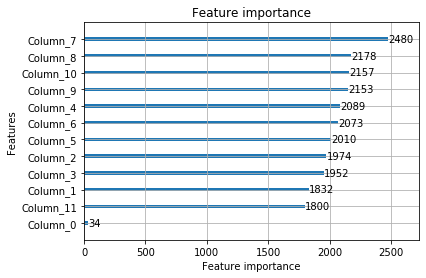

In [149]:
lightgbm.plot_importance(model)

* we can drop 0th column which is 'type' as it is not important for tree

In [157]:
df = df_orig.copy()
df['type'] = df.type.map({'red': 1, 'white': 0})
df['quality'] = df['quality'].map({3:0, 4:0, 5:1, 6:2, 7:3, 8:4, 9:4})
np.random.seed(RANDOM_SEED)
df.drop(columns='type', inplace=True)
x_train_val, x_test, y_train_val, y_test = train_test_split(df.drop(columns=['quality']),
                                                             df['quality'],
                                                             stratify=df['quality'],
                                                             test_size=0.2,
                                                             shuffle=True,
                                                             random_state=RANDOM_SEED )

x_train_val['weight'] = y_train_val.map(y_train_val.value_counts(normalize=True))


In [158]:
light_ds_train = lightgbm.Dataset(x_train_val, label=y_train_val, weight='weight', )
x_train_val.drop(columns='weight', inplace=True)

In [160]:
model = lightgbm.train(parameters,
                       light_ds_train,
                       num_boost_round=num_boost_round,
                      )
res = []
pred_train = np.argmax(model.predict(x_train_val), axis=1)
acc_train = (y_train_val == pred_train).sum() / len(y_train_val)
f1_train = f1_score(y_train_val, pred_train, average='weighted')
bal_acc_train = recall_score(y_train_val, pred_train, average='weighted')
res.append(['train', acc_train, f1_train, bal_acc_train, len(y_train_val)])

pred_test = np.argmax(model.predict(x_test), axis=1)
acc_test = (y_test == pred_test).sum() / len(y_test)
f1_test = f1_score(y_test, pred_test, average='weighted')
bal_acc_test = recall_score(y_test, pred_test, average='weighted')
res.append(['test', acc_test, f1_test, bal_acc_test, len(y_test)])

df_res = pd.DataFrame(res, columns = ['Eval', 'Acc', 'Rec', 'F1', 'Support'])
df_res

,Eval,Acc,Rec,F1,Support
0,train,0.974468,0.974479,0.974468,5170
1,test,0.661253,0.654543,0.661253,1293


* so type was missleading in our case, removing that field improved all classes expect the 0 th which could be because of low support


In [205]:
pd.DataFrame(np.array(precision_recall_fscore_support(y_test, pred_test, average=None)).T,
             columns = ['Prec', 'Rec', 'F1', 'Support'])

,Prec,Rec,F1,Support
0,0.000000,0.000000,0.000000,6.0
1,0.375000,0.418605,0.395604,43.0
2,0.620225,0.647887,0.633754,426.0
3,0.617845,0.650709,0.633851,564.0
4,0.563953,0.451163,0.501292,215.0
5,0.571429,0.421053,0.484848,38.0
6,0.000000,0.000000,0.000000,1.0


In [148]:
pd.DataFrame(np.array(precision_recall_fscore_support(y_test, pred_test, average=None)).T,
             columns = ['Prec', 'Rec', 'F1', 'Support'])

,Prec,Rec,F1,Support
0,0.583333,0.285714,0.383562,49.0
1,0.685780,0.701878,0.693735,426.0
2,0.634069,0.712766,0.671119,564.0
3,0.605714,0.493023,0.543590,215.0
4,0.625000,0.384615,0.476190,39.0
